<a href="https://colab.research.google.com/github/MargaritaKotova/Tensorflow-2.0-Deep-Learning-and-Artificial-Intelligence-course/blob/master/Linear_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
 !pip install "tensorflow>=2.0.0"
 import tensorflow as tf
print(tf.__version__)

2.1.0


In [0]:
from sklearn.datasets import load_breast_cancer 

In [0]:
data = load_breast_cancer()

In [24]:
type(data)

sklearn.utils.Bunch

In [25]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [26]:
data.data.shape

(569, 30)

In [27]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [28]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [29]:
data.target.shape

(569,)

In [30]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)
N, D = X_train.shape

In [0]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
N

381

In [34]:
model = tf.keras.models.Sequential([tf.keras.layers.Input(shape=(D,)), tf.keras.layers.Dense(1,activation='sigmoid')])

model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy'] )

r = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=100)


print("Train score:", model.evaluate(X_train, y_train))
print("Test score", model.evaluate(X_test, y_test))

Train on 381 samples, validate on 188 samples
Epoch 1/100
381/381 [==============================] - 0s 964us/sample - loss: 0.9328 - accuracy: 0.3543 - val_loss: 0.9385 - val_accuracy: 0.3457
Epoch 2/100
381/381 [==============================] - 0s 88us/sample - loss: 0.8326 - accuracy: 0.4383 - val_loss: 0.8415 - val_accuracy: 0.4096
Epoch 3/100
381/381 [==============================] - 0s 111us/sample - loss: 0.7449 - accuracy: 0.5144 - val_loss: 0.7562 - val_accuracy: 0.5000
Epoch 4/100
381/381 [==============================] - 0s 85us/sample - loss: 0.6681 - accuracy: 0.5879 - val_loss: 0.6834 - val_accuracy: 0.5957
Epoch 5/100
381/381 [==============================] - 0s 85us/sample - loss: 0.6019 - accuracy: 0.6903 - val_loss: 0.6225 - val_accuracy: 0.6755
Epoch 6/100
381/381 [==============================] - 0s 84us/sample - loss: 0.5479 - accuracy: 0.7664 - val_loss: 0.5702 - val_accuracy: 0.7606
Epoch 7/100
381/381 [==============================] - 0s 83us/sample - loss

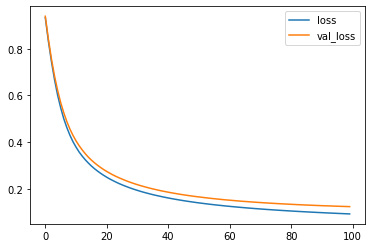

In [35]:
import matplotlib.pyplot as plt

plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

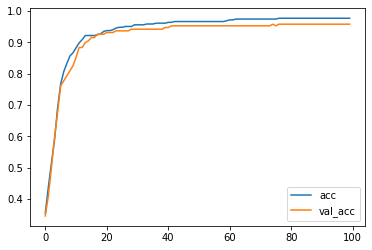

In [36]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

# Making Predictions

In [37]:
P = model.predict(X_test)
print(P) #there are outputs of the sigmoid, interpreted as probabilities p(y=1|x)

[[9.97462630e-01]
 [9.83229816e-01]
 [8.85750413e-01]
 [5.99256158e-01]
 [9.49295461e-01]
 [9.94509518e-01]
 [2.16855094e-01]
 [3.41673642e-02]
 [8.05427283e-02]
 [9.00129259e-01]
 [8.80990267e-01]
 [8.22746217e-01]
 [3.90595309e-02]
 [9.07064602e-03]
 [9.94608760e-01]
 [1.57083576e-07]
 [9.98442948e-01]
 [9.18737590e-01]
 [7.71454434e-05]
 [9.94885623e-01]
 [2.13726759e-02]
 [9.91107047e-01]
 [9.98778045e-01]
 [9.66343760e-01]
 [9.41929042e-01]
 [2.67182034e-03]
 [9.56516743e-01]
 [9.88085628e-01]
 [9.16497707e-01]
 [9.94715750e-01]
 [9.64610159e-01]
 [9.74970043e-01]
 [1.30813700e-04]
 [7.43827343e-01]
 [9.66853440e-06]
 [7.65413092e-03]
 [9.97488379e-01]
 [2.94677578e-02]
 [6.27775909e-04]
 [9.92315412e-01]
 [9.80759442e-01]
 [9.92681921e-01]
 [9.89596188e-01]
 [5.04113734e-01]
 [9.97608304e-01]
 [9.14843202e-01]
 [9.37240064e-01]
 [6.62567914e-01]
 [9.98033822e-01]
 [9.97571051e-01]
 [9.99839664e-01]
 [9.82305467e-01]
 [9.53713238e-01]
 [9.96427596e-01]
 [8.73375893e-01]
 [4.140063

In [38]:
import numpy as np

P = np.round(P).flatten()
print(P)

[1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0.
 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1.
 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0.
 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1.]


In [39]:
print("Manually calculated accuracy", np.mean(P == y_test))
print("Evaulated accuracy", model.evaluate(X_test, y_test))

Manually calculated accuracy 0.9574468085106383
188/188 [==============================] - 0s 58us/sample - loss: 0.1254 - accuracy: 0.9574
Evaulated accuracy [0.12536947587703137, 0.9574468]


# Saving and loading a Model

In [0]:
model.save('linearclassifier.h5')

In [41]:
!ls lh

ls: cannot access 'lh': No such file or directory


In [43]:
model = tf.keras.models.load_model('linearclassifier.h5')
print(model.layers)
model.evaluate(X_test, y_test)

188/188 [==============================] - 0s 403us/sample - loss: 0.1254 - accuracy: 0.9574


[0.12536947587703137, 0.9574468]

In [0]:
from google.colab import files

files.download('linearclassifier.h5')